In [1]:
import data_utils as data
import numpy as np
import ecg_utils as ecg
import matplotlib.pyplot as plt


## Loading in Apple Watch Data
The apple watch data is stored in a .csv file. The data is loaded into a pandas dataframe and the first 10 rows are removed, and the rest is the juicy signal to which we convert and export into a numpy array.

In [2]:
lead_1 = data.ecg_data(file_path='/Users/kevindejbod/dynamic-ecg/data/ecg_2021-12-17.csv')

Signal not too long, not slicing
Execution time for grad_sqaure_conv: 0.0006091594696044922 seconds
Execution time for threshold_calc: 7.200241088867188e-05 seconds
Execution time for peak: 0.0004208087921142578 seconds
Execution time for r_wave_detector: 0.0011680126190185547 seconds
Execution time for threshold_calc: 4.792213439941406e-05 seconds
Execution time for peak: 8.916854858398438e-05 seconds
Execution time for p_wave_detector: 0.0002853870391845703 seconds
Execution time for calculate_rr_int: 3.314018249511719e-05 seconds


In [3]:
lead_1 = data.ecg_data(file_path='/Users/kevindejbod/dynamic-ecg/data/sample_ecg.npz')

Signal not too long, not slicing
Execution time for grad_sqaure_conv: 0.014405250549316406 seconds
Execution time for threshold_calc: 0.0007572174072265625 seconds
Execution time for peak: 0.0015239715576171875 seconds
Execution time for r_wave_detector: 0.01675891876220703 seconds
Execution time for threshold_calc: 0.0005590915679931641 seconds
Execution time for peak: 0.0013668537139892578 seconds
Execution time for p_wave_detector: 0.005248069763183594 seconds
Execution time for calculate_rr_int: 3.314018249511719e-05 seconds
Signal not too long, not slicing
Execution time for grad_sqaure_conv: 0.013939142227172852 seconds
Execution time for threshold_calc: 0.0005340576171875 seconds
Execution time for peak: 0.0012249946594238281 seconds
Execution time for r_wave_detector: 0.015743017196655273 seconds
Execution time for threshold_calc: 0.00044798851013183594 seconds
Execution time for peak: 0.0011630058288574219 seconds
Execution time for p_wave_detector: 0.00490880012512207 seconds

In [4]:
2*(lead_1.lead_1.r_peaks[:,0].shape[0])

2156

In [5]:
lead_1.lead_1.rr_int/1000

array([0.275, 0.39 , 0.401, ..., 0.38 , 0.385, 0.414])

In [6]:
lead_1.lead_1.signal[lead_1.lead_1.r_peaks[:,0]]

array([ 0.301,  0.097, -0.068, ..., -0.812, -0.804, -0.831])

In [7]:
import numpy as np
from scipy.io.wavfile import write

# Sample rate (samples per second)
sample_rate = 44100

# Frequencies (pitches) in Hz and their durations in seconds
frequencies = lead_1.lead_1.signal[lead_1.lead_1.r_peaks[:,0]]
durations = lead_1.lead_1.rr_int/1000

# Generate audio signal
audio_signal = np.array([], dtype=np.float32)
for freq, duration in zip(frequencies, durations):
    t = np.linspace(0, duration, int(sample_rate * duration), False)
    note = np.sin(freq * t * 2 * np.pi)
    audio_signal = np.concatenate((audio_signal, note))

# Normalize to 16-bit range
audio_signal = np.int16(audio_signal / np.max(np.abs(audio_signal)) * 32767)

# Save as WAV file
write('output.wav', sample_rate, audio_signal)


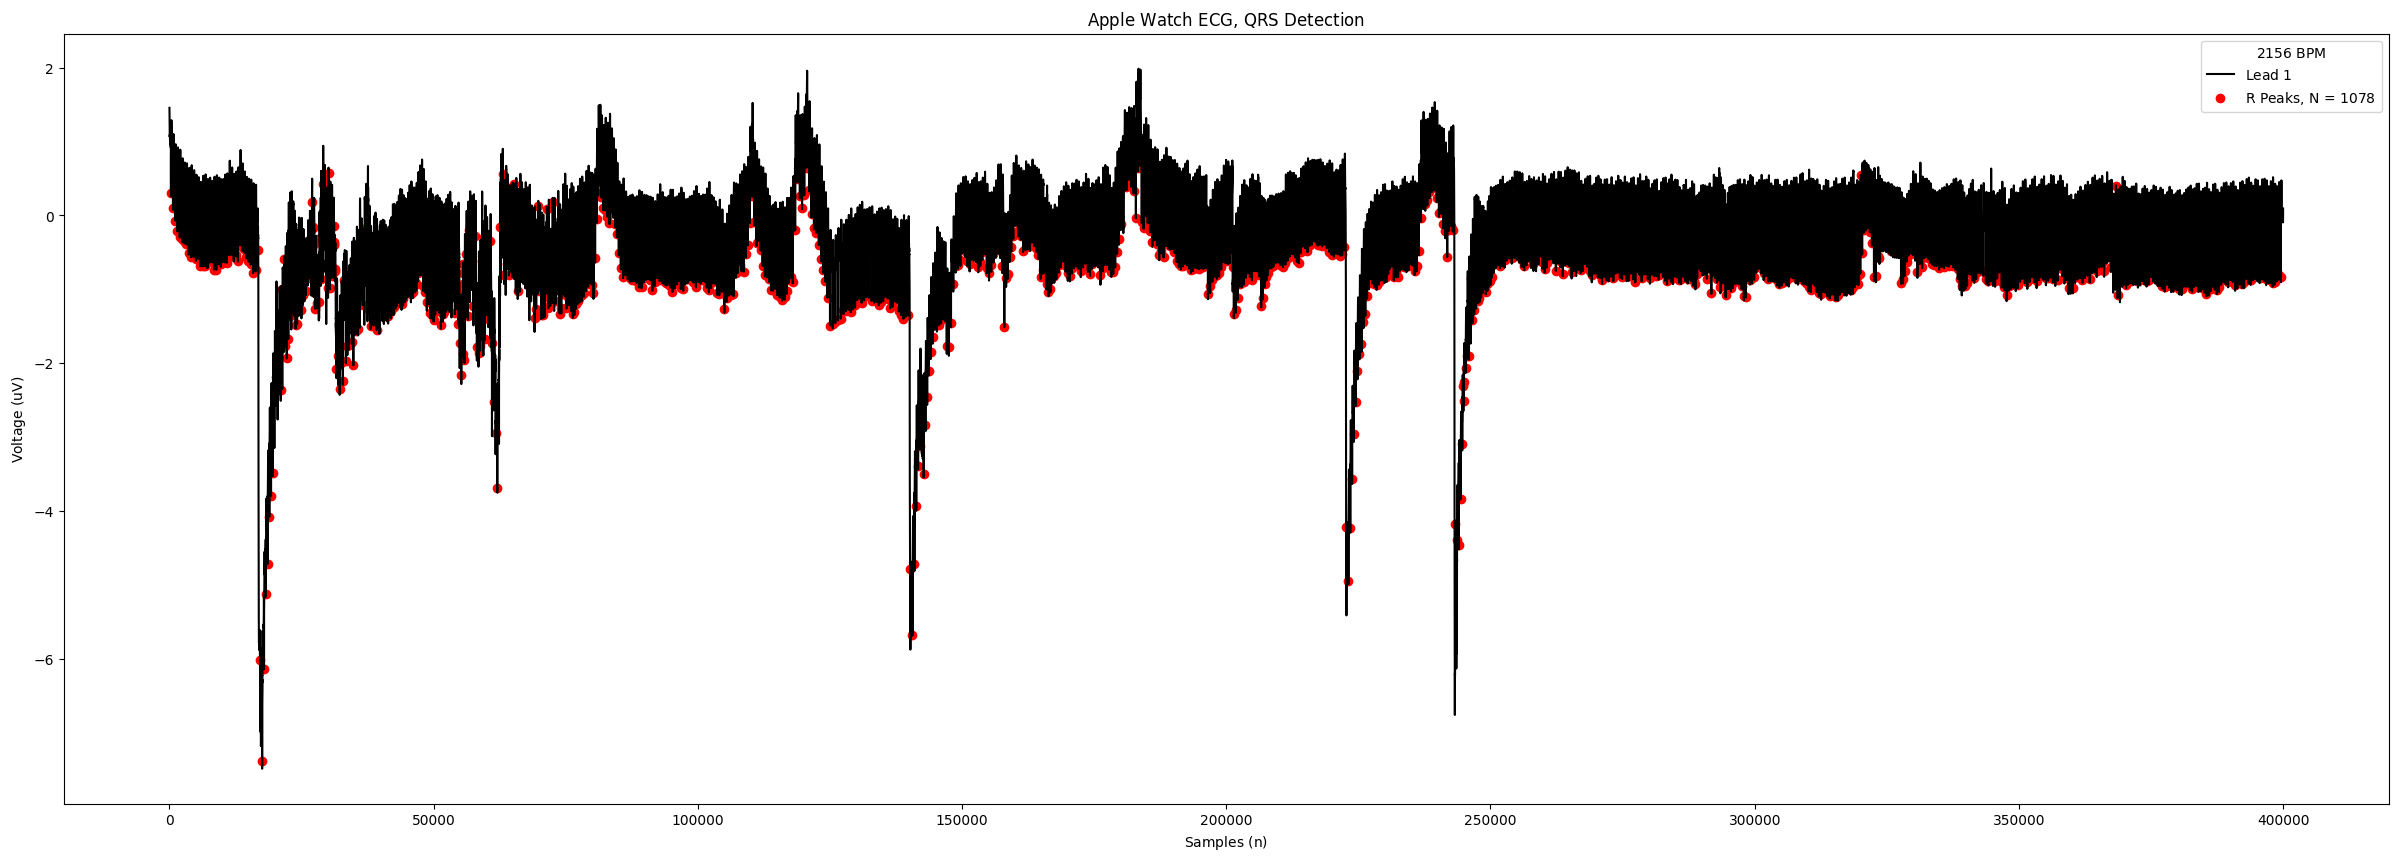

<Figure size 640x480 with 0 Axes>

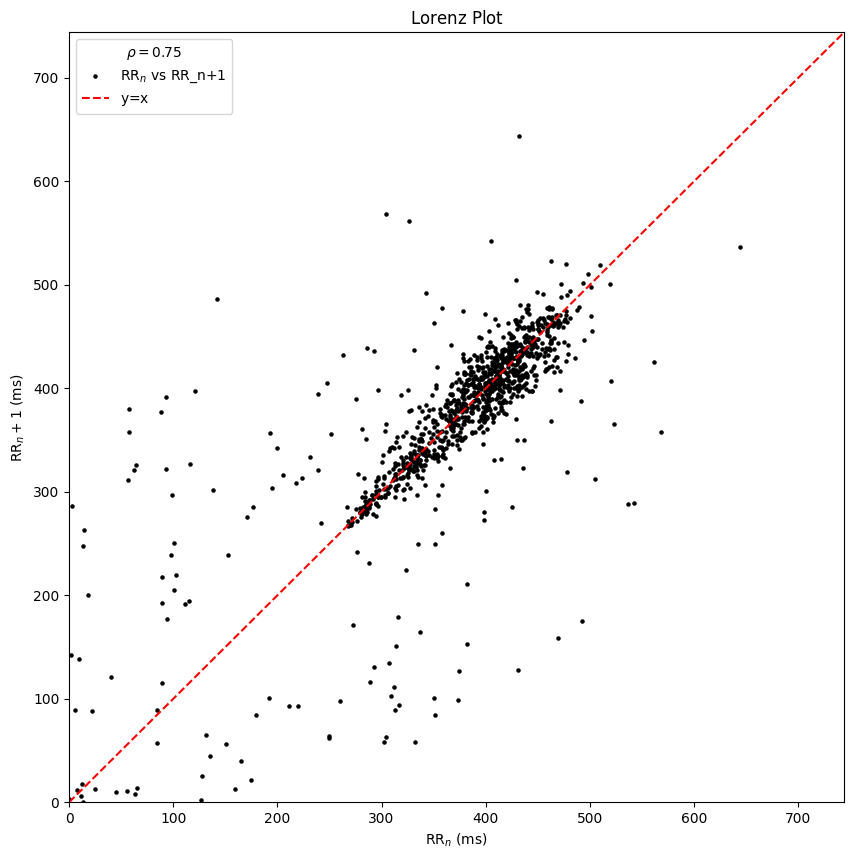

In [8]:
lead_1.lead_1.r_plot()